In [10]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('up');
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('down');

<IPython.core.display.Javascript object>

In [12]:
import pandas as pd

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso

In [21]:
df = pd.read_parquet("yellow_tripdata_2023-01.parquet").iloc[:100_000]

In [22]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,2023-01-02 14:56:24,2023-01-02 15:16:33,1.0,3.72,1.0,N,186,236,1,21.2,0.00,0.5,6.30,0.0,1.0,31.50,2.5,0.00
99996,2,2023-01-02 14:12:54,2023-01-02 14:21:00,1.0,0.00,1.0,N,162,107,1,8.6,0.00,0.5,2.00,0.0,1.0,14.60,2.5,0.00
99997,2,2023-01-02 14:30:33,2023-01-02 14:33:00,1.0,0.00,1.0,N,90,249,1,4.4,0.00,0.5,1.68,0.0,1.0,10.08,2.5,0.00
99998,2,2023-01-02 14:34:28,2023-01-02 14:41:43,1.0,0.00,1.0,N,249,164,1,7.9,0.00,0.5,2.38,0.0,1.0,14.28,2.5,0.00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[us]
 3   passenger_count        100000 non-null  float64       
 4   trip_distance          100000 non-null  float64       
 5   RatecodeID             100000 non-null  float64       
 6   store_and_fwd_flag     100000 non-null  object        
 7   PULocationID           100000 non-null  int64         
 8   DOLocationID           100000 non-null  int64         
 9   payment_type           100000 non-null  int64         
 10  fare_amount            100000 non-null  float64       
 11  extra                  100000 non-null  float64       
 12  mta_tax                100000 non-null  float

In [24]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60.0)

In [25]:
df.duration

0         8.433333
1         6.316667
2        12.750000
3         9.616667
4        10.833333
           ...    
99995    20.150000
99996     8.100000
99997     2.450000
99998     7.250000
99999    11.850000
Name: duration, Length: 100000, dtype: float64

In [26]:
td = df.duration[0]
td

8.433333333333334

C:\Users\user\AppData\Local\Temp\ipykernel_22248\3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Density'>

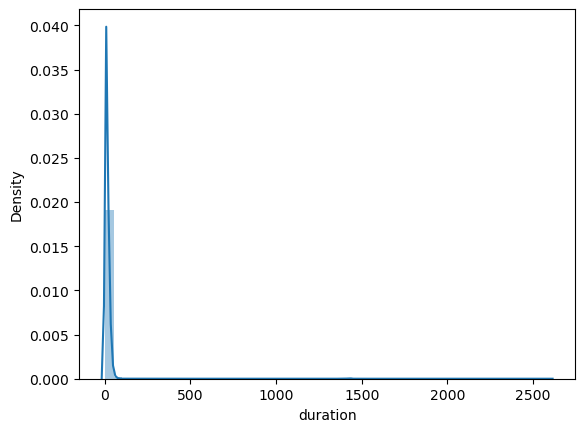

In [27]:
sns.distplot(df.duration)

In [28]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    100000.000000
mean         16.709873
std          57.098317
min           0.000000
50%          11.566667
95%          35.783333
98%          44.166667
99%          51.500167
max        2596.633333
Name: duration, dtype: float64

In [29]:
((df.duration >= 1) & (df.duration <=60)).mean()

0.9782

In [30]:
# Filter to 1 hour trip duration
df = df[(df.duration >= 1) & (df.duration <=60)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,2023-01-02 14:56:24,2023-01-02 15:16:33,1.0,3.72,1.0,N,186,236,1,21.2,0.00,0.5,6.30,0.0,1.0,31.50,2.5,0.00,20.150000
99996,2,2023-01-02 14:12:54,2023-01-02 14:21:00,1.0,0.00,1.0,N,162,107,1,8.6,0.00,0.5,2.00,0.0,1.0,14.60,2.5,0.00,8.100000
99997,2,2023-01-02 14:30:33,2023-01-02 14:33:00,1.0,0.00,1.0,N,90,249,1,4.4,0.00,0.5,1.68,0.0,1.0,10.08,2.5,0.00,2.450000
99998,2,2023-01-02 14:34:28,2023-01-02 14:41:43,1.0,0.00,1.0,N,249,164,1,7.9,0.00,0.5,2.38,0.0,1.0,14.28,2.5,0.00,7.250000


In [31]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [32]:
df[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [33]:
pd.get_dummies(df, columns=categorical, dtype=int)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,DOLocationID_256,DOLocationID_257,DOLocationID_258,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,2,9.3,1.00,...,0,0,0,0,0,0,0,0,0,0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,1,7.9,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,1,14.9,1.00,...,0,0,0,0,0,0,0,0,0,0
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,1,12.1,7.25,...,0,0,0,0,0,0,0,0,0,0
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,1,11.4,1.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,2023-01-02 14:56:24,2023-01-02 15:16:33,1.0,3.72,1.0,N,1,21.2,0.00,...,0,0,0,0,0,0,0,0,0,0
99996,2,2023-01-02 14:12:54,2023-01-02 14:21:00,1.0,0.00,1.0,N,1,8.6,0.00,...,0,0,0,0,0,0,0,0,0,0
99997,2,2023-01-02 14:30:33,2023-01-02 14:33:00,1.0,0.00,1.0,N,1,4.4,0.00,...,0,0,0,0,0,0,0,0,0,0
99998,2,2023-01-02 14:34:28,2023-01-02 14:41:43,1.0,0.00,1.0,N,1,7.9,0.00,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# We want to convert categorical columns into one-hot encoding...
# We can use sklearn.feature_extraction.DictVectorizer, 
# but it requires converting the columns to strings

df[categorical] = df[categorical].astype(str)

C:\Users\user\AppData\Local\Temp\ipykernel_22248\43255850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [35]:
train_dicts = df[categorical + numerical].to_dict(orient='records')
train_dicts[:5]

[{'PULocationID': '161', 'DOLocationID': '141', 'trip_distance': 0.97},
 {'PULocationID': '43', 'DOLocationID': '237', 'trip_distance': 1.1},
 {'PULocationID': '48', 'DOLocationID': '238', 'trip_distance': 2.51},
 {'PULocationID': '138', 'DOLocationID': '7', 'trip_distance': 1.9},
 {'PULocationID': '107', 'DOLocationID': '79', 'trip_distance': 1.43}]

In [36]:
dv = DictVectorizer(sparse=False)

In [37]:
X_train = dv.fit_transform(train_dicts)

In [38]:
X_train

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.97],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.1 ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.51],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.99]])

In [39]:
# dv.feature_names_

In [40]:
y_train = df.duration.values
y_train

array([ 8.43333333,  6.31666667, 12.75      , ...,  2.45      ,
        7.25      , 11.85      ])

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
lr.coef_.shape

(483,)

In [43]:
y_pred = lr.predict(X_train)

C:\Users\user\AppData\Local\Temp\ipykernel_22248\1877227026.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Prediction')
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_22248\1877227026.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

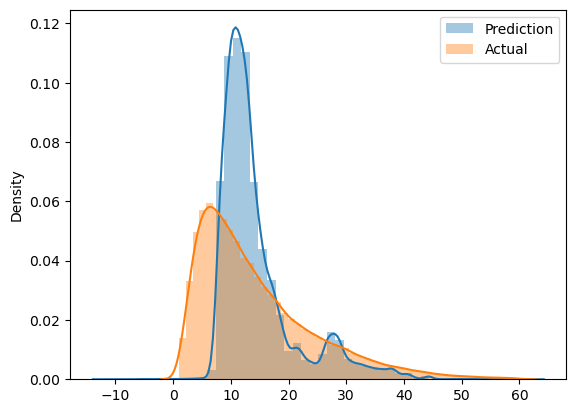

In [45]:
sns.distplot(y_pred, label='Prediction')
sns.distplot(y_train, label='Actual')

plt.legend()

In [46]:
from sklearn.metrics import mean_squared_error

In [48]:
# Root mean squared error
mean_squared_error(y_train, y_pred, squared=False)

7.593930249796634

In [50]:
df_train = df

In [53]:
df_val = pd.read_parquet('yellow_tripdata_2023-02.parquet').iloc[:100_000]
df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60.0)
df_val = df_val[(df_val.duration >= 1) & (df_val.duration <=60)]

In [58]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [54]:
dv = DictVectorizer(sparse=False)

In [59]:
X_train = dv.fit_transform(train_dicts)
y_train = df_train.duration.values

X_val = dv.transform(val_dicts)
y_val = df_val.duration.values

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(X_val)

In [62]:
mean_squared_error(y_val, y_pred, squared=False)

11.338715486132086

C:\Users\user\AppData\Local\Temp\ipykernel_22248\4095677390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Prediction')
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_22248\4095677390.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

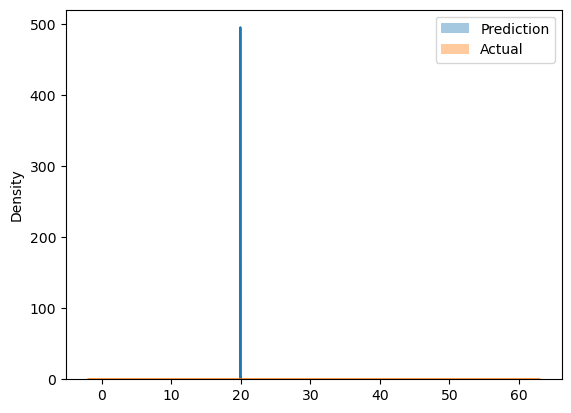

In [63]:
sns.distplot(y_pred, label='Prediction')
sns.distplot(y_val, label='Actual')

plt.legend()